In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [239]:
df = pd.read_csv("Chess_FIDE_Rankings.csv")

In [240]:
df.head(20)

,rank,name,ELO,title,federation,games,birth_year
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990
1,2,Liren Ding,2806,GM,China,1630,1992
2,3,Alireza Firouzja,2793,GM,France,845,2003
3,4,Fabiano Caruana,2783,GM,United States,2622,1992
4,5,Levon Aronian,2775,GM,United States,3320,1982
5,6,Wesley So,2773,GM,United States,1902,1993
6,7,Ian Nepomniachtchi,2766,GM,Russian Federation,2297,1990
7,8,Richard Rapport,2764,GM,Hungary,1278,1996
8,9,Anish Giri,2760,GM,Netherlands,2209,1994
9,10,Hikaru Nakamura,2760,GM,United States,3147,1987


In [241]:
len(df.columns) # there are 7 columns which are ranking, name, ELO, title, federation, games and birth year

7

In [242]:
len(df.index) # there are 200 rows which means 200 chess players 

200

In [243]:
df["title"].unique # all 200 chess players are Grand masters

<bound method Series.unique of 0      GM
1      GM
2      GM
3      GM
4      GM
       ..
195    GM
196    GM
197    GM
198    GM
199    GM
Name: title, Length: 200, dtype: object>

# Cleaning the Data (small updates for better analysis)

In [244]:
df.columns = df.columns.str.strip() # There are some spaces in columns that make problems so this code will take it out.

In [245]:
df.isna().sum()

rank          0
name          0
ELO           0
title         0
federation    0
games         0
birth_year    0
dtype: int64

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        200 non-null    int64 
 1   name        200 non-null    object
 2   ELO         200 non-null    int64 
 3   title       200 non-null    object
 4   federation  200 non-null    object
 5   games       200 non-null    int64 
 6   birth_year  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [247]:
df = df.sort_values(by=['ELO'], ascending=[True]) # I changed sorted the DataFrame according to ELO of the players

In [248]:
df.head(20)

,rank,name,ELO,title,federation,games,birth_year
199,200,Vadim Milov,2608,GM,Switzerland,1583,1972
195,196,Boris Alterman,2608,GM,Israel,697,1970
198,199,Surya Shekhar Ganguly,2608,GM,India,1811,1983
197,198,Jonas Buhl Bjerre,2608,GM,Denmark,411,2004
196,197,Chithambaram VR Aravindh,2608,GM,India,535,1999
193,194,David Baramidze,2609,GM,Germany,1123,1988
194,195,Christian Bauer,2609,GM,France,2092,1977
192,193,Max Warmerdam,2610,GM,Netherlands,421,2000
191,192,Manuel Petrosyan,2610,GM,Armenia,732,1998
190,191,Niclas Huschenbeth,2610,GM,Germany,761,1992


In [249]:
# Analysis of the top 3 federations with most players

In [250]:
top_3_federations = df['federation'].value_counts().head(3)
top_3_federations

Russian Federation     22
United States          19
India                  17
Name: federation, dtype: int64

In [251]:
# It seems like most of the players are from Russian Federation, United States and India

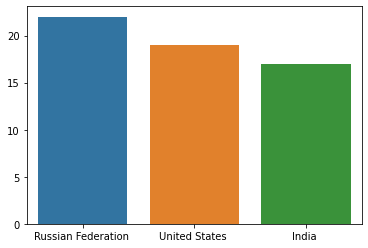

In [252]:
sns.barplot(x= top_3_federations.index, y= top_3_federations.to_list())
plt.show()

# Best players from TOP 3 federations

In [253]:
indian_df = df[df["federation"] == "India "]
us_df = df[df["federation"] == "United States "]
russian_df = df[df["federation"] == "Russian Federation "]

In [254]:
top_3_federations = pd.concat([indian_df, russian_df, us_df], axis=0)

In [255]:
top_3_federations.head(5)

,rank,name,ELO,title,federation,games,birth_year
198,199,Surya Shekhar Ganguly,2608,GM,India,1811,1983
196,197,Chithambaram VR Aravindh,2608,GM,India,535,1999
187,188,Aryan Chopra,2610,GM,India,277,2001
186,187,Raunak Sadhwani,2611,GM,India,511,2005
182,183,Abhimanyu Puranik,2612,GM,India,539,2000


In [256]:
top_3_federations.sort_values(by=['ELO'], ascending=[True]).head(10)

,rank,name,ELO,title,federation,games,birth_year
198,199,Surya Shekhar Ganguly,2608,GM,India,1811,1983
196,197,Chithambaram VR Aravindh,2608,GM,India,535,1999
187,188,Aryan Chopra,2610,GM,India,277,2001
189,190,Aleksey Dreev,2610,GM,Russian Federation,3360,1969
186,187,Raunak Sadhwani,2611,GM,India,511,2005
182,183,Abhimanyu Puranik,2612,GM,India,539,2000
177,178,Murali Karthikeyan,2613,GM,India,677,1999
173,174,Ildar Khairullin,2615,GM,Russian Federation,1083,1990
169,170,Denis Khismatullin,2616,GM,Russian Federation,1528,1984
166,167,Daniel Naroditsky,2617,GM,United States,478,1995


According to the analysis, most of the players are from United States, India and Russian Federation. Out of these top 3 federations, the players with most ELO is Indian players. 

The player with the best ELO is Chithambaram VR Aravindh and Surya Shekhar Ganguly. Both players are from India and their ELO is same. 

# Is young generation better than the old generation?

In order to understand this, we need to learn more about the age of these people. To do this, I will inert the age function to the list and analyze it accordingly.

In [257]:
import datetime
df['age'] = datetime.datetime.now().year - df['birth_year']


df.head(5)

,rank,name,ELO,title,federation,games,birth_year,age
199,200,Vadim Milov,2608,GM,Switzerland,1583,1972,50
195,196,Boris Alterman,2608,GM,Israel,697,1970,52
198,199,Surya Shekhar Ganguly,2608,GM,India,1811,1983,39
197,198,Jonas Buhl Bjerre,2608,GM,Denmark,411,2004,18
196,197,Chithambaram VR Aravindh,2608,GM,India,535,1999,23


In [258]:
df_age = df.sort_values(['age', 'ELO'], ascending=[True, True])

In [259]:
df_age.iloc[[42]]

,rank,name,ELO,title,federation,games,birth_year,age
104,105,Rasmus Svane,2649,GM,Germany,1029,1997,25


In [260]:
young = df_age.iloc[0:100]
best_young_players = young.sort_values(['ELO'], ascending=[False])

best_young_players.head(10)

,rank,name,ELO,title,federation,games,birth_year,age
1,2,Liren Ding,2806,GM,China,1630,1992,30
2,3,Alireza Firouzja,2793,GM,France,845,2003,19
3,4,Fabiano Caruana,2783,GM,United States,2622,1992,30
5,6,Wesley So,2773,GM,United States,1902,1993,29
7,8,Richard Rapport,2764,GM,Hungary,1278,1996,26
8,9,Anish Giri,2760,GM,Netherlands,2209,1994,28
14,15,Jan Krzysztof Duda,2750,GM,Poland,1213,1998,24
19,20,Dmitry Andreikin,2729,GM,FIDE,1567,1990,32
21,22,Yi Wei,2727,GM,China,979,1999,23
22,23,Quang Liem Le,2722,GM,Viet Nam,1725,1991,31


In [261]:
old = df_age.iloc[100:200]
best_old_players = old.sort_values(['ELO'], ascending=[False])

best_old_players.head(10)

,rank,name,ELO,title,federation,games,birth_year,age
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990,32
4,5,Levon Aronian,2775,GM,United States,3320,1982,40
6,7,Ian Nepomniachtchi,2766,GM,Russian Federation,2297,1990,32
10,11,Maxime Vachier Lagrave,2760,GM,France,2899,1990,32
9,10,Hikaru Nakamura,2760,GM,United States,3147,1987,35
11,12,Shakhriyar Mamedyarov,2759,GM,Azerbaijan,3003,1985,37
12,13,Viswanathan Anand,2756,GM,India,3913,1969,53
13,14,Leinier Dominguez Perez,2754,GM,United States,1301,1983,39
15,16,Sergey Karjakin,2747,GM,Russian Federation,2932,1990,32
16,17,Alexander Grischuk,2745,GM,Russian Federation,3235,1983,39


I divided the data frame to 2 parts. My aim was to divide the data frame from the median age. I did this through sorting the data frame with age and I divided the df into two parts

As we can see the players from top 10 old and young generation, old generation which is older than 30 years old have a better ELO record. This is correlated to the amount of games they played and the experience they gained.

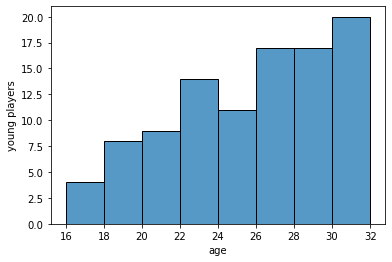

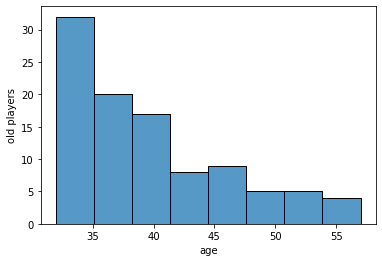

In [262]:
young_hist = sns.histplot(x = 'age',data = young )
young_hist.set(xlabel='age', ylabel='young players')
plt.show()

old_hist = sns.histplot(x = 'age',data = old)
old_hist.set(xlabel='age', ylabel='old players')
plt.show()


When we visualize the data, we see something interesting. We see that most of the players are around 25 to 35. It is the prime time of many chess players.

We know that young players still have time to improve their ELO, however, we cannot be certain that if the old people at the end of the age spectrum are same or not

This leads to another question,

# Is there a correlation with the increase of age and increase in ELO scores?

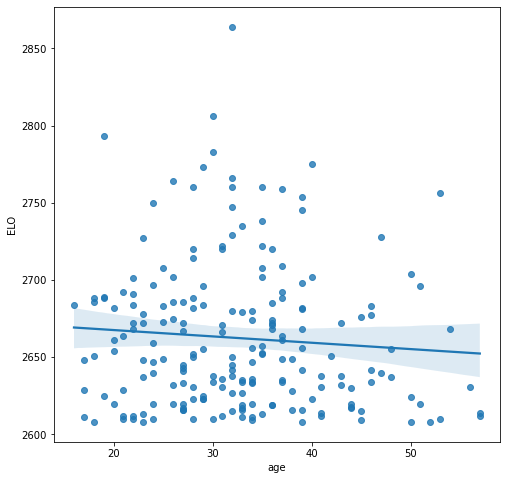

In [263]:
plt.figure(figsize=(8,8))
sns.regplot(x='age',y='ELO', data= df)
plt.show()

We see above on the graph that as age increases, ELO of the players decrease. Additionally, players with best ELO are around the ages of 30 to 40 (E.G. Magnus Carlsen)